###Importing necessary libraries

In [1]:
#importing reading and manipulating data libraries
import pandas as pd
import numpy as np

#import libraries to split data
from sklearn.model_selection import train_test_split

#data vizualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

###Importing the dataset

In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/file/d/13lpMBpRu4sS2pz4NYUBURTPMPNfytYvs/view?usp=sharing'
# Verify that you have everything after '='
fluff, id = link.split('=')
print (id) 

id = link.split("/")[-2]
#  storing a dataset in pandas
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('EasyVisa.csv')  
df = pd.read_csv('EasyVisa.csv', on_bad_lines='skip')
#making a copy of the dataset
data_copy = df.copy()

sharing


###Displaying the dataset

In [4]:
#displaying the head of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


- The output above shows the first 5 rows of the dataset

In [5]:
#displaying the tail of the dataset
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


- The output shows the last 5 rows of the dataset

###Data overview

######sanity checks

**checking the shape of the dataset**

In [6]:
#shape
df.shape

(569, 33)

- The dataset has 569 rows and 33 columns

**checking datatypes of columns**

In [7]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- The dataframe has 31 columns with float datatypes 1 column with integer datatype and 1 of string datatype

**Checking for duplicates**

In [8]:
# checking for duplcates
df.duplicated().sum()

0

- The dataset has no redundant values

** Checking for missing values**

In [9]:
#checking for null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

- The column unnamed has 569 missing values. These are very many missing values.
- Apart from that column, no other column has missing values

###Exploratory Data Analysis

######Univariet analysis

######Bivarient analysis

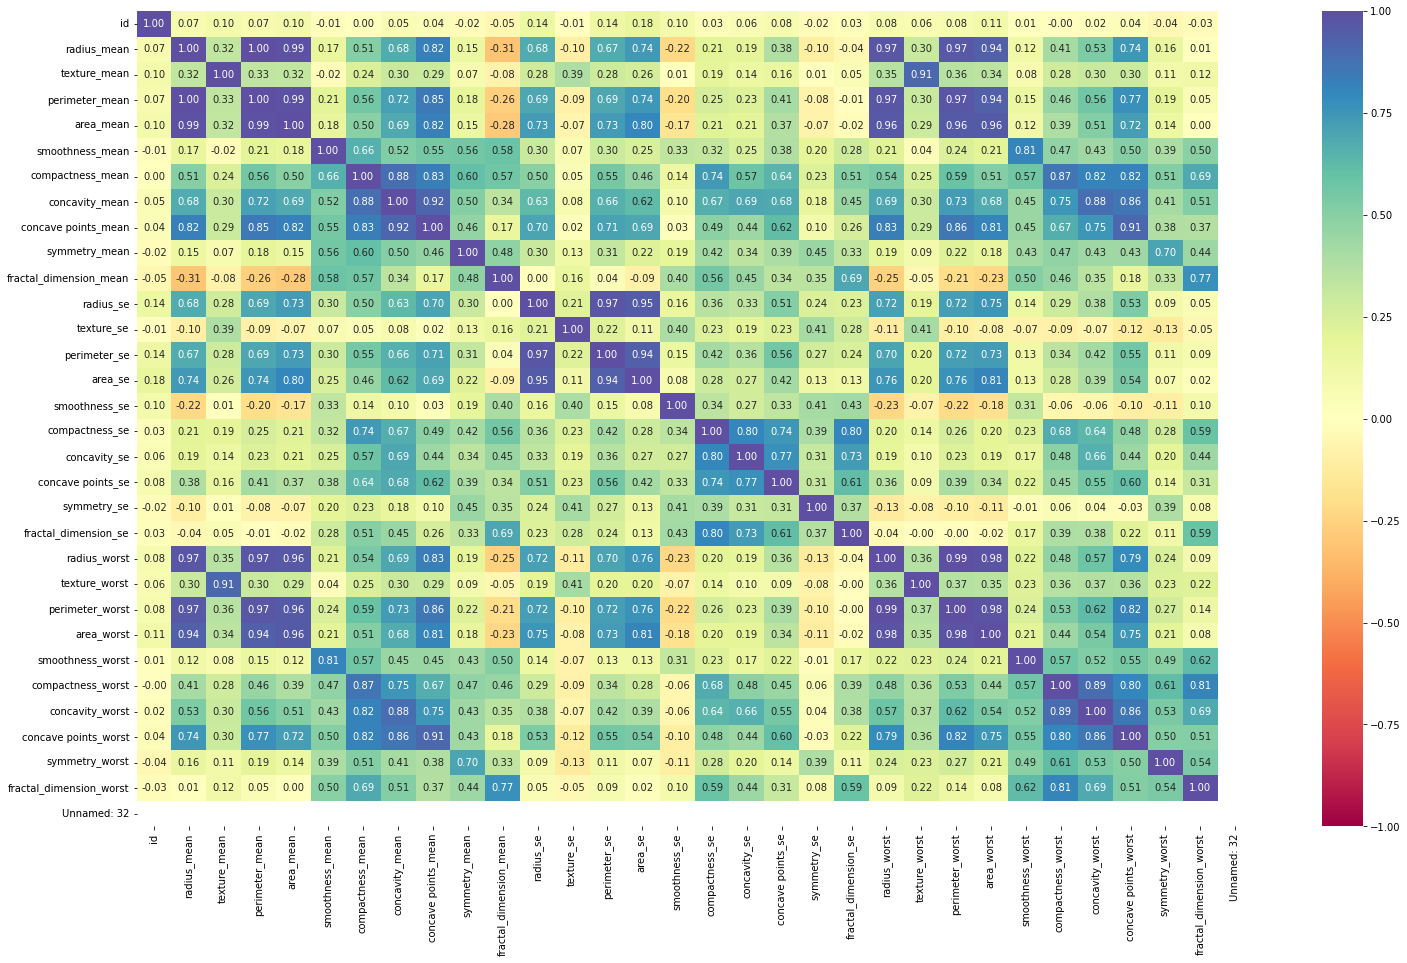

In [10]:
#selecting numeric columns
cols_list = df.select_dtypes(include=np.number).columns.tolist()

#plotting the heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) 
plt.show()

######Studying the target variable

In [11]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
#Getting the number of different categories
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

- 357 people have begnin type of growth while 212 people have malignant type of growth


###Feature Engineering

In [13]:
#copying the dataset
data = df.copy()
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


- creating a data copy to work with

**Dropping columns**

In [14]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
#dropping ID column
data = data.drop(['id'], axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


- The column ID has been dropped

In [16]:
#dropping unnamed 32 column
data = data.drop(['Unnamed: 32'], axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- The column has been dropped

###Preparing data for modelling

######feature restructuring

In [17]:
#function to replace string values with numbers in columns
replaceStructure = {
                "diagnosis":     {"M": 1, "B": 0 }
              
}

In [18]:
#replacing the values
data =data.replace(replaceStructure)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- The structure of diagnosis has been altered. 1 has replaced malignin and 0 has replaced bengin.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

- Now all the columns have either an int or a float datatype

######Defining the dependent and independent variable

In [20]:
# splitting the data into the dependent and independent variables
x = data.drop("diagnosis" , axis=1)
y = data.pop("diagnosis")
print(x.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

- Our dependent variable is diagnosis column.
- The column has been dropped and stored in y

######Splitting the data into training and testing set

In [21]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1,stratify=y)

In [22]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (398, 30)
Shape of test set :  (171, 30)
Percentage of classes in training set:
0    0.628141
1    0.371859
Name: diagnosis, dtype: float64
Percentage of classes in test set:
0    0.625731
1    0.374269
Name: diagnosis, dtype: float64


- The output shows the shape of the training and testing set of trhe model
- The training ha 398 rows while the test set has 171 rows

In [23]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
215,13.86,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.05602,0.2106,0.06916,...,15.75,26.93,104.40,750.1,0.14600,0.4370,0.46360,0.16540,0.3630,0.10590
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,...,11.16,26.84,71.98,384.0,0.14020,0.1402,0.10550,0.06499,0.2894,0.07664
218,19.80,21.56,129.70,1230.0,0.09383,0.13060,0.12720,0.08691,0.2094,0.05581,...,25.73,28.64,170.30,2009.0,0.13530,0.3235,0.36170,0.18200,0.3070,0.08255
287,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.11860,0.05366,0.2309,0.06915
458,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.12180,0.1093,0.04462,0.05921,0.2306,0.06291


###Building models

######Decision Tree

In [24]:
#building a decision tree
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

- A decision tree has been created

######predicting on the train and test set

In [25]:
 #Predicting on train and tests
predict_train = dTree.predict(x_train)
predict_test = dTree.predict(x_test)

######Getting the accuracy of the tree

In [26]:
#Accuracy of the model
train_accuracy = dTree.score(x_train,y_train)
test_accuracy = dTree.score(x_test,y_test)
print("Accuracy on training set : ",dTree.score(x_train,y_train))
print("Accuracy on test set : ",dTree.score(x_test,y_test))


Accuracy on training set :  1.0
Accuracy on test set :  0.9298245614035088


- As shown the accuracy of the train set is 1.0 while the accuracy on the test set is 0.9298
- This shows that the tree is overfitting data

######Getting the recall of the tree

In [27]:
#Recall of the model    
train_recall = metrics.recall_score(y_train, predict_train )
test_recall = metrics.recall_score(y_test, predict_test)
print("Recall on training set : ",train_recall)
print("Recall on test set : ",test_recall)

Recall on training set :  1.0
Recall on test set :  0.875


- As shown the recall of the train set is 1.0 while the accuracy on the test set is 0.875
- This shows that the tree is overfitting data

######Getting the precision of the tree

In [28]:
#precision of the model    
train_precision = metrics.precision_score(y_train, predict_train )
test_precision = metrics.precision_score(y_test, predict_test)
print("precision on training set : ",train_precision)
print("precision on test set : ",test_precision)

precision on training set :  1.0
precision on test set :  0.9333333333333333


- As shown the precision of the train set is 1.0 while the accuracy on the test set is 0.93333
- This shows that the tree is overfitting data

#####Making a confusion matrix of train data

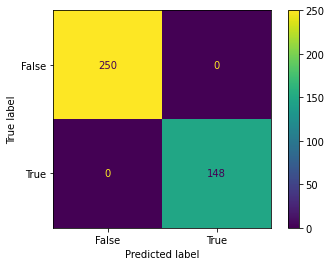

<Figure size 720x504 with 0 Axes>

In [29]:
#making the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train, predict_train)
#dislaying the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.figure(figsize = (10,7))
plt.show()

######Making a confusion matrix of test data

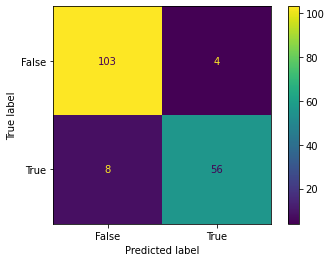

<Figure size 720x504 with 0 Axes>

In [30]:
#making the confusion matrix
confusion_matrix1 = metrics.confusion_matrix(y_test, predict_test)
#dislaying the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])
cm_display.plot()
plt.figure(figsize = (10,7))
plt.show()

######Random forest model

In [31]:
#making a random ofrest
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)

RandomForestClassifier()

######predicting using the model

In [32]:
 #Predicting on train and tests
predict_train1 = randomforest.predict(x_train)
predict_test1= randomforest.predict(x_test)

######Getting the accuracy of the model

In [33]:
#Accuracy of the model
train_accuracy1 = randomforest.score(x_train,y_train)
test_accuracy1 = randomforest.score(x_test,y_test)
print("Accuracy on training set : ",train_accuracy1)
print("Accuracy on test set : ",test_accuracy1)


Accuracy on training set :  1.0
Accuracy on test set :  0.9415204678362573


######Getting the recall of the model

In [34]:
#Recall of the model    
train_recall1 = metrics.recall_score(y_train, predict_train1)
test_recall1= metrics.recall_score(y_test, predict_test1)
print("Recall on training set : ",train_recall1)
print("Recall on test set : ",test_recall1)

Recall on training set :  1.0
Recall on test set :  0.875


######Getting the precision of the model

In [35]:
#precision of the model    
train_precision1= metrics.precision_score(y_train, predict_train1 )
test_precision1= metrics.precision_score(y_test, predict_test1)
print("precision on training set : ",train_precision1)
print("precision on test set : ",test_precision1)

precision on training set :  1.0
precision on test set :  0.9655172413793104


######Making a confusion matrix of train data

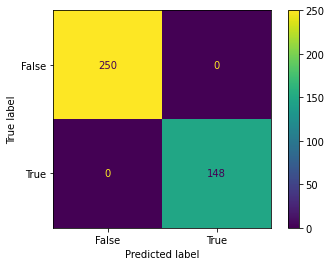

<Figure size 720x504 with 0 Axes>

In [36]:
#making the confusion matrix
confusion_matrix2 = metrics.confusion_matrix(y_train, predict_train1)
#dislaying the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])
cm_display.plot()
plt.figure(figsize = (10,7))
plt.show()

######Making a confusion matrix with test data

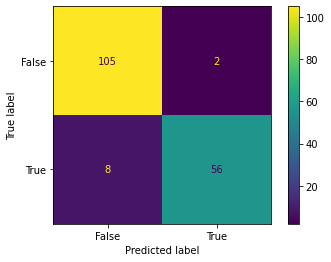

<Figure size 720x504 with 0 Axes>

In [37]:
#making the confusion matrix
confusion_matrix3 = metrics.confusion_matrix(y_test, predict_test1)
#dislaying the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [False, True])
cm_display.plot()
plt.figure(figsize = (10,7))
plt.show()

######Bagging model

In [38]:
#making a random ofrest
Bagging_t= BaggingClassifier(random_state=1)
Bagging_t.fit(x_train, y_train)

BaggingClassifier(random_state=1)

######predicting using the model

In [39]:
 #Predicting on train and tests
predict_train2 = Bagging_t.predict(x_train)
predict_test2= Bagging_t.predict(x_test)

######Getting the accuracy of the model

In [40]:
#Accuracy of the model
train_accuracy2 = Bagging_t.score(x_train,y_train)
test_accuracy2 = Bagging_t.score(x_test,y_test)
print("Accuracy on training set : ",train_accuracy2)
print("Accuracy on test set : ",test_accuracy2)


Accuracy on training set :  0.9974874371859297
Accuracy on test set :  0.935672514619883


######Getting the recall of the model

In [41]:
#Recall of the model    
train_recall2= metrics.recall_score(y_train, predict_train2)
test_recall2= metrics.recall_score(y_test, predict_test2)
print("Recall on training set : ",train_recall2)
print("Recall on test set : ",test_recall2)

Recall on training set :  0.9932432432432432
Recall on test set :  0.859375


######Getting the precision of the model

In [42]:
#precision of the model    
train_precision2= metrics.precision_score(y_train, predict_train2 )
test_precision2= metrics.precision_score(y_test, predict_test2)
print("precision on training set : ",train_precision2)
print("precision on test set : ",test_precision2)

precision on training set :  1.0
precision on test set :  0.9649122807017544


######Making the confusion matrix on train data

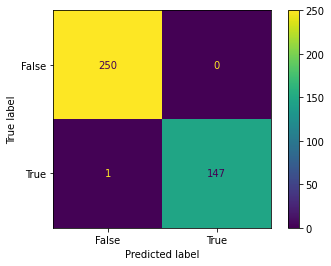

<Figure size 720x504 with 0 Axes>

In [43]:
#making the confusion matrix
confusion_matrix4 = metrics.confusion_matrix(y_train, predict_train2)
#dislaying the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix4, display_labels = [False, True])
cm_display.plot()
plt.figure(figsize = (10,7))
plt.show()

######Making a confusion matrix of test data

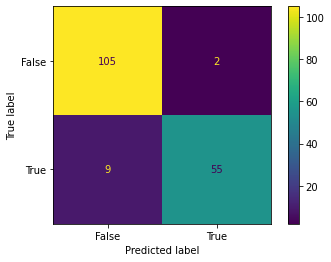

<Figure size 720x504 with 0 Axes>

In [44]:
#making the confusion matrix
confusion_matrix5 = metrics.confusion_matrix(y_test, predict_test2)
#dislaying the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix5, display_labels = [False, True])
cm_display.plot()
plt.figure(figsize = (10,7))
plt.show()

######Making a dataframe to compare the results

In [45]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    
    #Accuracy of the model
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(x_train,y_train))
        print("Accuracy on test set : ",model.score(x_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [46]:
# list of models made
models_made = [dTree,randomforest,Bagging_t,]

# empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models_made:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],4))
    acc_test.append(np.round(j[1],4))
    recall_train.append(np.round(j[2],4))
    recall_test.append(np.round(j[3],4))
    precision_train.append(np.round(j[4],4))
    precision_test.append(np.round(j[5],4))

######Comparing the models

In [47]:
comparison_dataframe = pd.DataFrame({'Model':['Decision Tree', 'Random forest', 
                                              'Bagging classifier'
                                       ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_dataframe

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.0000,0.9298,1.0000,0.8750,1.0,0.9333
1,Random forest,1.0000,0.9415,1.0000,0.8750,1.0,0.9655
2,Bagging classifier,0.9975,0.9357,0.9932,0.8594,1.0,0.9649


- The dataframe shows the comparision of different models
- The random forest and the bagging classifier models have the same performance metrics.

######Feature importance

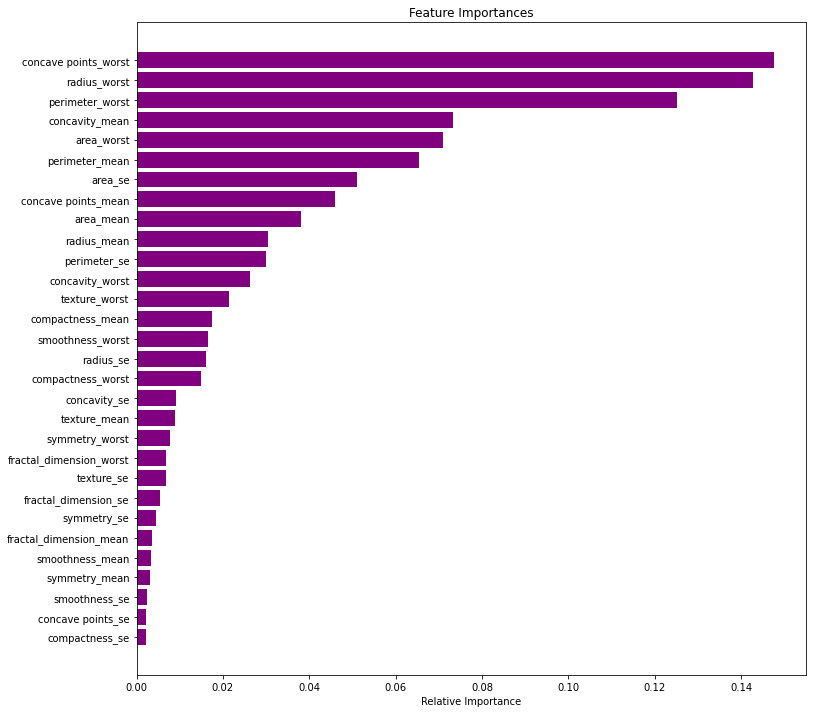

In [48]:
#getting feature importance
importances = randomforest.feature_importances_
indices = np.argsort(importances)
feature_names = list(x.columns)

#plotting the features
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- The diagram above shows the feature importance from the highest to the lowest
- The most important feature is perimeter worst
- The least important feature is fractal dimension mean